# Modelado y Evaluación + SHAP



In [ ]:
#Modelado
## ¿Podrías intentar mejorar el modelo actual creando nuevas variables?
## ¿Que equipo tendrá mejor AUC?
# Importamos las diferentes librerías
## Nombre de la librería y alias que le ponemos en nuestro notebook
## Los alias con las que las importamos suelen ser muy estandares

# Importar y manipular datos
import pandas as pd

# Graficar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Algebra
import numpy as np

import warnings
warnings.filterwarnings('ignore')
# Cargamos
df = pd.read_csv('https://raw.githubusercontent.com/carlosbort/datasets/master/bank_churn/telecom_churn.csv')

# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

# Creamos variables dummies
vmp = pd.get_dummies(df['Voice mail plan'],drop_first=True,prefix="voice")   #
ip = pd.get_dummies(df['International plan'],drop_first=True,prefix="ip")

# Quitamos columna State.
# TO DO: ¿Alguna idea para ahora?
df.drop('State',axis=1,inplace=True)

# Quitamos columnas voice mail e International plan
df.drop(['Voice mail plan','International plan'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip],axis=1)

# TO DO: ¿Podemos crear más variables?


# Separamos train y test
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1),
                                                    df['Churn'], test_size=0.25,
                                                    random_state=101)



## Ejercicio

Modifica los hyperparametros para maximizar tu AUC
- `max_depth`
- `max_features`

Modifica en el grafico el `:1` por `:0`

[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
# Importamos el modelo y entrenamos
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')
#rf_mod = RandomForestClassifier()
rf_mod = RandomForestClassifier(max_depth=10,random_state=101)
rf_mod.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=101)

In [ ]:
pres_test = rf_mod.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, pres_test[:,1])
print('Team AUC:', roc_auc)

Team AUC: 0.8975373963028284


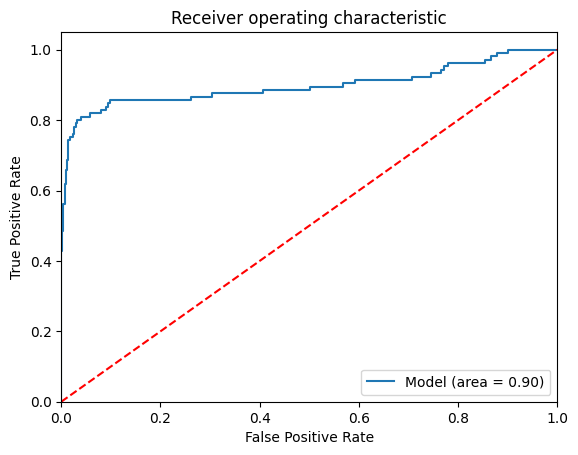

In [ ]:
# Modifica en el gráfico el 1 por el 0
fpr, tpr, thresholds = roc_curve(y_test, pres_test[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print('Team AUC:', roc_auc)

Team AUC: 0.8975373963028284


# Ejercicio XGBoost

- Ajusta un xgboost y calcula el accuracy de tu modelo
- Utiliza el método predic_ proba para sacar la probabilidades de conversión de los usuarios
- Evalua con las diferentes métricas de evaluación

In [ ]:
def accuracy_v2(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  accuracy_score = (tp + tn) / (tp + tn + fp + fn)
  return accuracy_score

In [ ]:
xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0,
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

accuracy_score(preds,y_test)
accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))


XGBoost's prediction accuracy WITH optimal hyperparameters is: 92.81


In [ ]:
# Utiliza el método predict_proba
preds_p = xgboost.predict_proba(X_test)
preds_p

array([[0.9033433 , 0.0966567 ],
       [0.89282566, 0.10717436],
       [0.8879126 , 0.11208742],
       ...,
       [0.90987426, 0.09012572],
       [0.90464413, 0.0953559 ],
       [0.8756596 , 0.1243404 ]], dtype=float32)

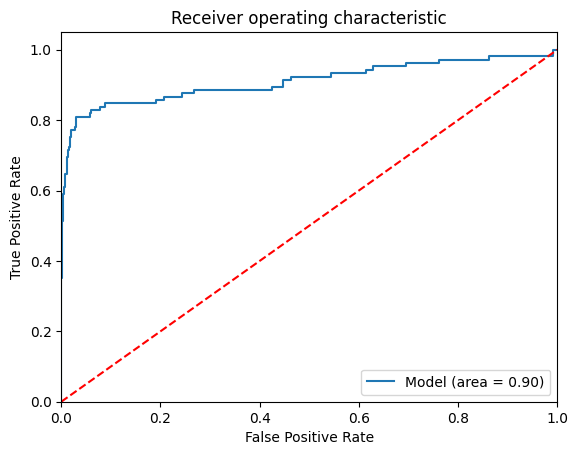

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, preds_p[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, preds_p[:,1])
print('Team AUC:', roc_auc)

Team AUC: 0.9099875889999346


# Ejercicio

Evalua la interpretabilidad de tu modelo con los valores de Shaply

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
X_train.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,voice_Yes,ip_Yes
2907,165,510,0,209.4,67,35.60,273.8,89,23.27,150.2,88,6.76,12.8,1,3.46,0,0,0
1254,62,510,33,186.4,84,31.69,201.0,136,17.09,286.7,103,12.90,11.1,3,3.00,2,1,0
576,92,415,0,201.9,74,34.32,226.8,119,19.28,217.5,80,9.79,13.7,6,3.70,3,0,0
1024,146,510,0,133.0,65,22.61,262.8,93,22.34,214.3,128,9.64,11.2,3,3.02,1,0,1
2064,67,415,0,138.9,65,23.61,208.9,109,17.76,232.4,82,10.46,9.2,3,2.48,2,0,0


In [ ]:
# compute SHAP values
explainer = shap.Explainer(xgboost, X_train)
shap_values = explainer(X_train)

In [ ]:
## Summary


In [ ]:
## Scatter


In [ ]:
## Scatter 2

In [ ]:
## Scatter 3

In [ ]:
## Scatter 4

In [ ]:
## Scatter 5

In [ ]:
## Waaterfall

# CV - All together

- Logistic
- k-NN
- Random Forest
- xgboost

Benchmark entre ellos y competición por equipos

In [ ]:
# Importamos las diferentes librerías
## Nombre de la librería y alias que le ponemos en nuestro notebook
## Los alias con las que las importamos suelen ser muy estandares

# Importar y manipular datos
import pandas as pd

# Graficar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Algebra
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargamos
df = pd.read_csv('https://raw.githubusercontent.com/carlosbort/datasets/master/bank_churn/telecom_churn.csv')

# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

# Creamos variables dummies
vmp = pd.get_dummies(df['Voice mail plan'],drop_first=True,prefix="voice")   #
ip = pd.get_dummies(df['International plan'],drop_first=True,prefix="ip")
state = pd.get_dummies(df['State'],drop_first=False)


# Quitamos columnas voice mail e International plan
df.drop(['Voice mail plan','International plan','State'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip,state],axis=1)



In [ ]:
df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,0,0


# Creación de nuevas variables

- Considera crear nuevas variables:



1.   Puedes utilizar las del ejercicio 1
2.   Puedes utilizar kmeans o PCA
3. Puedes utilizar variables que se te ocurran visualizando los datos o pensando en el problema



In [ ]:
# New variables
df.head()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,0,0


# Separación de train y test


In [ ]:
# Separamos train y test
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1),
                                                    df['Churn'], test_size=0.25,
                                                    random_state=101)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

**Logistic Regression**

In [ ]:
random.seed(113)
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [ ]:
print(scores['test_roc_auc'].shape)
scores['test_roc_auc']

(20,)


array([0.65732087, 0.775571  , 0.70158888, 0.68917577, 0.77308838,
       0.73684211, 0.80784508, 0.68073486, 0.69165839, 0.84011917,
       0.73982125, 0.69314796, 0.6693148 , 0.78252234, 0.80983118,
       0.80685204, 0.65690169, 0.76266137, 0.69414101, 0.62264151])

**Random Forest**



In [ ]:
random_forest = RandomForestClassifier(random_state = random.seed(113))

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

**k-NN**

In [ ]:
random.seed(113)
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

# Ejercicio
- Haz una comparativa Añadiendo el modelo XGBoost

In [ ]:
random.seed(113)

## MODIFICA / Añade parámetros
xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0,
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)


scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(xgboost, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
XGB_fit_time = scores['fit_time'].mean()
XGB_score_time = scores['score_time'].mean()
XGB_accuracy = scores['test_accuracy'].mean()
XGB_precision = scores['test_precision_macro'].mean()
XGB_recall = scores['test_recall_macro'].mean()
XGB_f1 = scores['test_f1_weighted'].mean()
XGB_roc = scores['test_roc_auc'].mean()

In [ ]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'xgboost'],
    'Fitting time': [LR_fit_time, forest_fit_time, KNN_fit_time, XGB_fit_time],
    'Scoring time': [LR_score_time, forest_score_time, KNN_score_time, XGB_score_time],
    'Accuracy'    : [LR_accuracy, forest_accuracy, KNN_accuracy, XGB_accuracy],
    'Precision'   : [LR_precision, forest_precision, KNN_precision, XGB_precision],
    'Recall'      : [LR_recall, forest_recall, KNN_recall, XGB_recall],
    'F1_score'    : [LR_f1, forest_f1, KNN_f1, XGB_f1],
    'AUC_ROC'     : [LR_roc, forest_roc, KNN_roc, XGB_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
1,Random Forest,1.134088,0.055353,0.934368,0.943404,0.795783,0.927223,0.911988
3,xgboost,0.236245,0.028399,0.929568,0.955441,0.771279,0.919702,0.907155
2,K-Nearest Neighbors,0.005939,0.032593,0.865561,0.761545,0.612085,0.838005,0.678947
0,Logistic Regression,0.237683,0.049783,0.849926,0.705854,0.533254,0.799300,0.729589


# Como toman decisiones los modelos anteriores?

Qué variables son las más importantes para tus modelos?

- xgboost
- Random forest
- Logistic regression

# Si tuvieras que accionar una campaña online

¿Sobre que variable lo harías?